# Decision Tree : Company Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
company = pd.read_csv('Company_data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company['Sales'].min()

0.0

In [5]:
company['Sales'].max()

16.27

In [6]:
company['Sales'] = np.where(company['Sales']>=8,'High','Low')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:
company['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [10]:
company['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])
company['Sales']=label_encoder.fit_transform(company['Sales'])

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [13]:
company['Sales'].value_counts()

1    236
0    164
Name: Sales, dtype: int64

In [14]:
company.shape

(400, 11)

In [15]:
#High = 0
#Low = 1

In [16]:
array = company.values
array.shape

(400, 11)

In [17]:
X = array[:,1:]
Y = array[:,0]

In [18]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [19]:
Y

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=7)

In [21]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[122  74   0 ...  13   1   0]
 [ 89  81  15 ...  12   1   1]
 [132  98   2 ...  12   1   1]
 ...
 [139  32   0 ...  11   0   0]
 [130  28   6 ...  16   1   1]
 [115  89   0 ...  12   1   0]]
[[130  35  10 ...  17   1   1]
 [122  26   0 ...  13   0   0]
 [128 105  11 ...  13   1   1]
 ...
 [117  42   7 ...  10   1   1]
 [ 93 117   9 ...  13   1   1]
 [113  22   0 ...  16   0   0]]
[1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 0 0 1 1]
[1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 

## Building Decision Tree Classifier

### Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[4] <= 121.5\nentropy = 0.98\nsamples = 268\nvalue = [112, 156]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 6.5\nentropy = 0.99\nsamples = 156\nvalue = [87, 69]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 90.5\nentropy = 0.949\nsamples = 76\nvalue = [28, 48]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.764\nsamples = 18\nvalue = [14, 4]'),
 Text(0.25, 0.125, 'entropy = 0.797\nsamples = 58\nvalue = [14, 44]'),
 Text(0.5, 0.375, 'X[5] <= 0.5\nentropy = 0.83\nsamples = 80\nvalue = [59, 21]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.644\nsamples = 61\nvalue = [51, 10]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\nentropy = 0.766\nsamples = 112\nvalue = [25, 87]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.8333333333333334, 0.375, 'X[5] <= 1.5\nentropy = 0.861\nsamples = 88\nvalue = [25, 63]'),
 Text(0.75, 0.125, 'entropy 

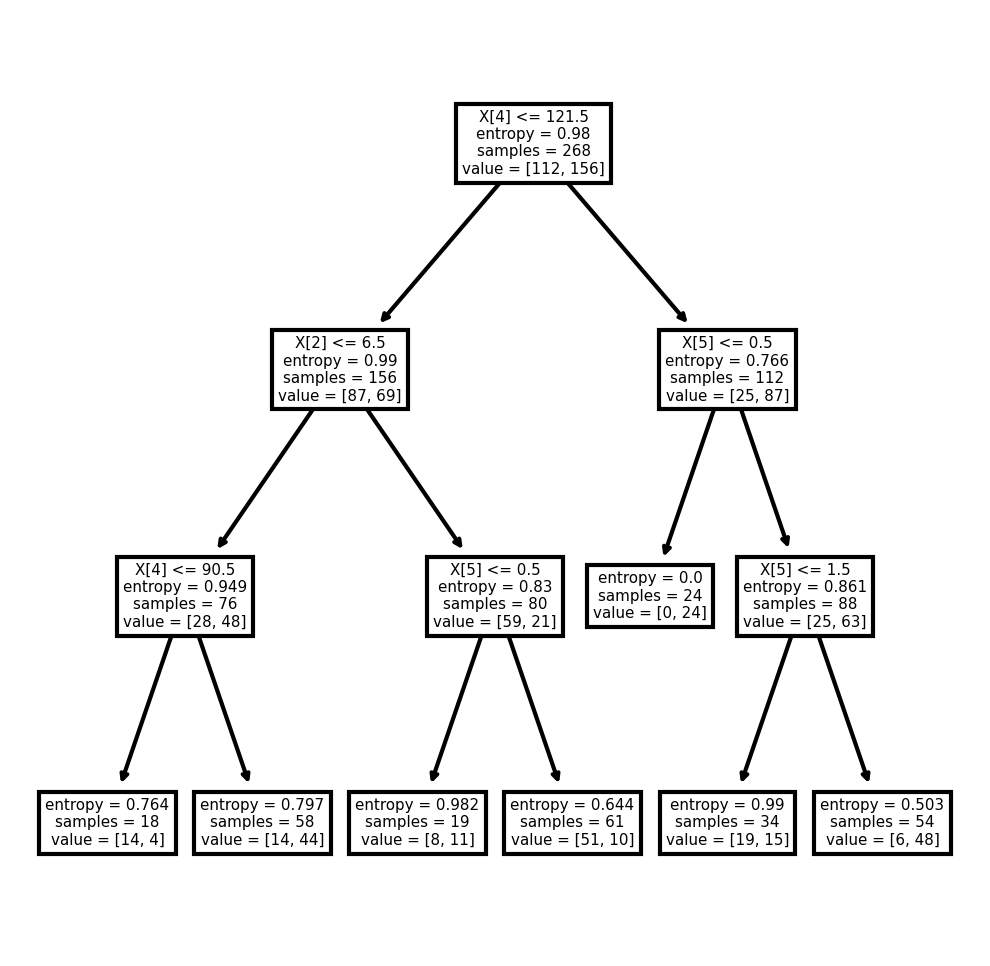

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model)

In [24]:
# Predicting on test data set 
pred_test = model.predict(x_test) 
pd.Series(pred_test).value_counts() # getting the count of each category 

1    87
0    45
dtype: int64

In [25]:
pred_test

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [26]:
pd.crosstab(y_test,pred_test)

col_0,0,1
row_0,,
0,32,20
1,13,67


In [27]:
# Accuracy 
np.mean(pred_test==y_test)

0.75

In [28]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66        52
           1       0.77      0.84      0.80        80

    accuracy                           0.75       132
   macro avg       0.74      0.73      0.73       132
weighted avg       0.75      0.75      0.75       132



In [29]:
# Predicting on train data set
pred_train = model.predict(x_train)  
pd.Series(pred_train).value_counts() # getting the count of each category 

1    155
0    113
dtype: int64

In [30]:
pd.crosstab(y_train,pred_train)

col_0,0,1
row_0,,
0,84,28
1,29,127


In [31]:
# Accuracy 
np.mean(pred_train==y_train)

0.7873134328358209

In [32]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       112
           1       0.82      0.81      0.82       156

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### Gini Index

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
#Prediction and computing the accuracy for test data
pred_test1=model_gini.predict(x_test)
np.mean(pred_test1==y_test)

0.7121212121212122

In [36]:
pd.crosstab(y_test,pred_test1)

col_0,0,1
row_0,,
0,30,22
1,16,64


In [37]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        52
           1       0.74      0.80      0.77        80

    accuracy                           0.71       132
   macro avg       0.70      0.69      0.69       132
weighted avg       0.71      0.71      0.71       132



In [38]:
#Prediction and computing the accuracy for train data
pred_train1=model_gini.predict(x_train)
np.mean(pred_train1==y_train)

0.8022388059701493

In [39]:
pd.crosstab(y_train,pred_train1)

col_0,0,1
row_0,,
0,74,38
1,15,141


In [40]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train1))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74       112
           1       0.79      0.90      0.84       156

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



### Bagging

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

# Bagging
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
results1 = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())       #Full data
print(results1.mean())      #Train data  

0.8099999999999999
0.8319088319088319


### AdaBoost Classification

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classification
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result = cross_val_score(model, X, Y, cv=kfold)
result1 = cross_val_score(model, x_train, y_train, cv=kfold)
print(result.mean())        #Full data
print(result1.mean())       #Train data

0.8075000000000001
0.812962962962963
